In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import pi

In [63]:
def f1(x):
    return 3.5*(x) - (3*pow((x),2)/2)  # function to be MAXIMIZED
def f2(x):
    return 3.5*(x-1) - (3*pow(x-1,2)/2)
    #return x * np.sin(x)  # function to be MAXIMIZED

No handles with labels found to put in legend.


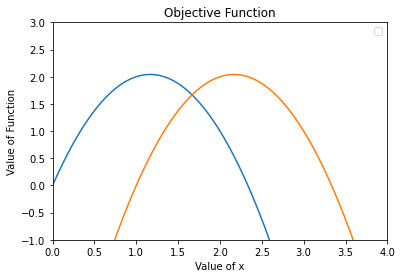

In [64]:
x = np.arange(0, 4, 0.0001)
y1 = f1(x)
y2 = f2(x)
plt.plot(x,y1,x,y2)
plt.xlabel('Value of x')
plt.ylabel('Value of Function')
plt.title('Objective Function')
plt.xlim([0,4])
plt.ylim([-1,3])
plt.legend()
plt.show()

In [65]:
np.random.randint(low=0, high=3, size =1)

array([1])

In [66]:
def initialize_population(population_size):
    population = []
    for j in range(population_size):
        xs = np.random.randint(low=0, high=4, size =1)
        x = np.random.randint(low=0, high=9, size = 4)
        x = np.append(xs,x)
        population = np.append(population,x)
    population = np.split(population, population_size)
    return population

#initialize_population(100)

def init_dis(population):
    pop = [''.join(str(int(p)) for p in po) for po in population ]
    pop = [float(p)/10000 for p in pop]
    popy = np.zeros(len(pop))
    #print(pop)
    x = np.arange(0, 4, 0.0001)
    y1 = f1(x)
    y2 = f2(x)
    ax = plt.subplot(111)
    ax.plot(x,y1,x,y2)
    ax.plot(pop,popy,'x','r')
    ax.set_xlabel('Value of x')
    ax.set_ylabel('Value of Function')
    ax.set_title('Objective Function')
    plt.xlim([0,4])
    plt.ylim([-1,3])
    ax.legend()
    plt.show() 
    
def display(population, fx):
    pop = [''.join(str(int(p)) for p in po) for po in population ]
    pop = [float(p)/10000 for p in pop]
    popy = np.zeros(len(pop))
    #print(pop)
    x = np.arange(0, 4, 0.0001)
    y1 = f1(x)
    y2 = f2(x)
    ax = plt.subplot(111)
    ax.plot(x,y1,x,y2)
    ax.plot(pop,popy,'x')
    ax.plot(pop,fx,'o')
    ax.set_xlabel('Value of x')
    ax.set_ylabel('Value of Function')
    ax.set_title('Objective Function')
    plt.xlim([0,4])
    plt.ylim([-1,3])
    ax.legend()
    plt.show() 

In [67]:
def double_point_crossover(parents, num_offspring):
    children = []
    for i in range(int(num_offspring/2)):
        index1 = np.random.randint(low=0, high=9)
        index2 = np.random.randint(low=0, high=9)
        parent1 = parents[index1]
        parent2 = parents[index2]
        offspring1 = np.append(parent1[0:2],parent2[2:4])
        offspring1 = np.append(offspring1 ,parent1[4:])
        offspring2 = np.append(parent2[0:2],parent1[2:4])
        offspring2 = np.append(offspring2, parent2[4:])
        children = np.append(children, offspring1)
        children = np.append(children, offspring2)
    children = np.split(children, num_offspring)
    return children

In [68]:
def mutation(children, prop):
    num_offspring = len(children)
    for i in range(num_offspring):
        probability = np.random.uniform(low=0, high=1)
        if probability < prop:
            random_value = np.random.randint(low=0, high=3)
            children[i][0] = random_value
        for j in range(1,5):
            probability = np.random.uniform(low=0, high=1)
            if probability < prop:
                random_value = np.random.randint(low=0, high=9)
                children[i][j] = random_value
    return children

In [69]:
def evaluate_fitness(population):
    population_size = len(population)
    fitness = []
    alpha = np.random.rand(1)[0]
    for j in range(population_size):
        ind = population[j]
        x = float(str((int(ind[0])))+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
        if float(x)<0 or float(x)>4: 
            fit = -1000
        else:
            fit1 = f1(x)
            fit2 = f2(x)
            fit = alpha * fit1 + (1 - alpha) * fit2
        
        fitness = np.append(fitness,fit)   
    return fitness, alpha

In [70]:
 def selection(population, fitness, num_parents):
    parents =[]
    for i in range(num_parents):
        if fitness[i] > fitness[num_parents*2-i-1]:
            parents.append(population[i])
        else:
            parents.append(population[num_parents*2-i-1])
    return parents

In [71]:
def form_elites(elites, elites_fx, population, fitness, alpha_x, alpha):
    if elites:
        for i in range(len(fitness)):
            if fitness[i] > elites_fx[i]:
                elites[i] = population[i]
                elites_fx[i] = fitness[i]
                alpha_x[i] = alpha
    else:
        elites = population
        elites_fx = fitness
        alpha_x = np.full(len(population),alpha)
    return elites,elites_fx, alpha_x

In [72]:
def genetic_algorithm(num_generations, population_size, prop=0.5):
    population = initialize_population(population_size)
    #display(population,)
    init_dis(population)
    best, avg, worst, bestx = [], [], [], []
    elites, elites_fx, alpha_x = [], [], []
    for gen in range(num_generations):
        
        fitness, alpha = evaluate_fitness(population)
        elites,elites_fx, alpha_x = form_elites(elites,elites_fx,population,fitness,alpha_x, alpha)
        best.append(np.max(fitness))
        avg.append(np.mean(fitness))
        worst.append(np.min(fitness))
        
        parents = selection(population,fitness,num_parents =int(population_size/2))
        children = double_point_crossover(parents, num_offspring = int(population_size/2))
        children = mutation(children,prop=0.05)
        population  = np.append(parents,children)
        
        population = np.split(population, population_size)
    
    fitness, alpha = evaluate_fitness(population)
    elites,elites_fx, alpha_x = form_elites(elites,elites_fx,population,fitness,alpha_x, alpha)
    best.append(np.max(fitness))
    avg.append(np.mean(fitness))
    worst.append(np.min(fitness))
    
    best_solution_index = np.argmax(fitness)
    best_OF_value = max(fitness)
    
    ind = population[best_solution_index]
    best_solution = float(str((int(ind[0])))+"."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4]))))
    
    return best_OF_value, best_solution, best, avg, worst, population, fitness, elites, elites_fx, alpha_x

No handles with labels found to put in legend.


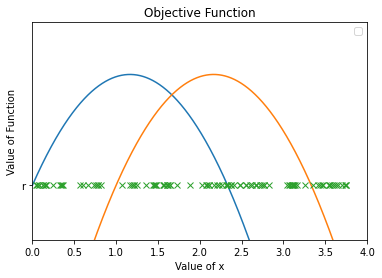

No handles with labels found to put in legend.


The largest value of the objective function is:  1.672593793802314


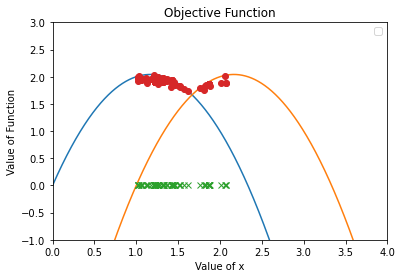

In [73]:
best_OF_value, best_solution, best, avg, worst, population, fitness, elites, elites_fx, alpha_x = genetic_algorithm(num_generations = 300, population_size=100, prop = 0.001)
print("The largest value of the objective function is: ",  best_OF_value)

display(elites, elites_fx)


No handles with labels found to put in legend.


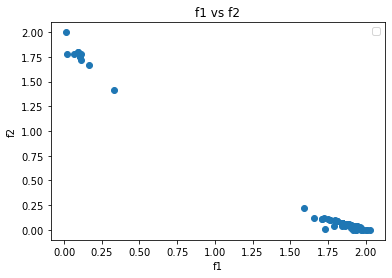

In [74]:
pop = [''.join(str(int(p)) for p in po) for po in elites ]
pop = [float(p)/10000 for p in pop]

f1_plot = [f1(pop[i])*alpha_x[i] for i in range(len(elites))]
f2_plot = [f2(pop[i])*(1 - alpha_x[i]) for i in range(len(elites))]


ax = plt.subplot(111)
ax.scatter(f1_plot,f2_plot )
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_title('f1 vs f2')
ax.legend()
plt.show() 

# 